In [67]:
import os
import pandas as pd
from datetime import datetime, timedelta

#Goeie site voor de data: https://nsrdb.nrel.gov/data-viewer
#Ook DNI is interesting, dit is dus rekening houdend met bewolking etc.

#DHI = Diffuse Horizontal Irradiance        #This is the light that falls on the panel indirectly, through scattering etc
#DNI = Direct Normal irradiance             #Amount of radiation recieved for a surface perpendicular to the sun-rays. -> This is what we need
#GHI = Global Horizontal Irradiance         #Sum of the two, for a surface horizontal to the ground (so not interely what we need for our solar panels)

file_path = os.path.join("NSRDB data", "465335_51.09_4.74_2019.csv")

df = pd.read_csv(file_path, skiprows=2)
names = df.columns
time_strings = [f"{year}-{month}-{day}-{hour}-{minute}" for year,month,day,hour,minute \
    in zip(list(df[names[0]]),list(df[names[1]]),list(df[names[2]]),list(df[names[3]]),list(df[names[4]]))]


#---------------------
day_date = datetime(2019,6,14,0,0)
end_date = day_date + timedelta(days=1)

start_index = time_strings.index(day_date.strftime('%Y-%m-%d-%H-%M').replace("-0", "-"))
end_index = time_strings.index(end_date.strftime('%Y-%m-%d-%H-%M').replace("-0", "-"))

one_day = time_strings[start_index:end_index]

#convert to datetime
one_day = [datetime.strptime(time, '%Y-%m-%d-%H-%M') for time in one_day]
irradiance = list(df["Clearsky DNI"])[start_index:end_index]

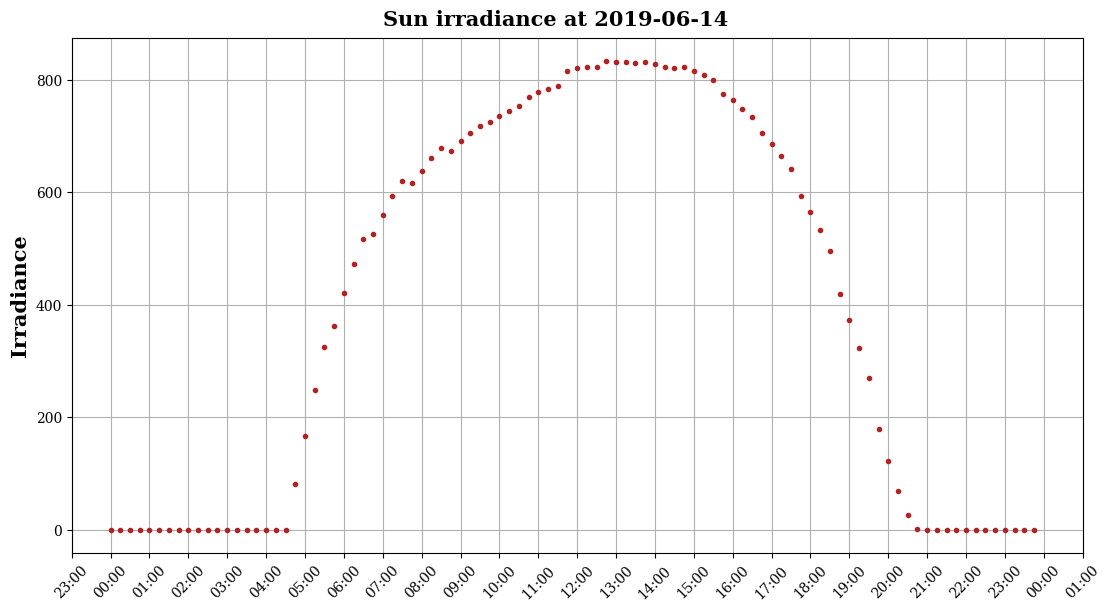

In [68]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.dates import (HOURLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange, HourLocator)
import datetime
import pandas as pd
rcParams["font.family"] = "Serif"



fig = plt.figure(figsize=(11,6), layout="constrained")
fig.suptitle(f"Sun irradiance at {day_date.strftime('%Y-%m-%d')}", fontsize=15, fontweight= "bold")
ax1 = fig.add_subplot(1,1,1)

ax1.plot(one_day, irradiance, '.', color='firebrick')


date1 = day_date - datetime.timedelta(hours=1)
date2 = day_date + datetime.timedelta(hours=25)
delta = datetime.timedelta(minutes=60)
dates = drange(date1, date2, delta)
formatter = DateFormatter('%H:%M')

ax1.set_xlim(date1, date2)

ax1.set_xticks(dates)
ax1.xaxis.set_tick_params(rotation=45, labelsize=10)
ax1.xaxis.set_major_formatter(formatter)
#ax1.set_xlabel("Time", fontsize=15, fontweight= "bold")
ax1.set_ylabel("Irradiance", fontsize=15, fontweight= "bold")
ax1.grid(True)

plt.show()

In [10]:
from datetime import datetime

day_one = datetime(2023,4,12,0,0)

import numpy as np

a = np.zeros((12,1))

print(a)

[0. 5.]


### Model for atmosphere attenuation

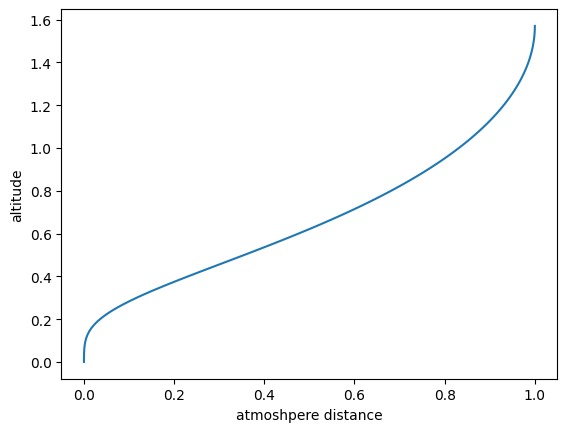

In [20]:
import numpy as np


def length_trough_atmosphere(altitude):
    r_a = 6371      #radius of the earth
    h_atm = 100     #new hyperparameter: 'height' of a homogeneous atmosphere.
    
    u = 2*r_a*np.sin(altitude)
    v = r_a**2-(r_a+h_atm)**2
    
    c1 = 1/2*(-u + np.sqrt(u**2-4*v))
    return c1

def attenuation_factor(altitude):
    l1 = length_trough_atmosphere(altitude)
    alpha = 0.01
    return np.exp(-alpha*l1+1)

altitude = np.linspace(0, np.pi/2, 100)

cs = [attenuation_factor(alti) for alti in altitude]

import matplotlib.pyplot as plt
plt.plot(cs, altitude)
plt.xlabel("atmoshpere distance")
plt.ylabel("altitude")
plt.show()
